# Practice 4

## Pedro Otero García & Alexandre Sousa Cajide

In [ ]:
import numpy as np

def extended_gcd(a, b):
    if b == 0:
        return a, 1, 0
    else:
        d, x, y = extended_gcd(b, a % b)
        return d, y, x - (a // b) * y

def multiplicative_inverse(r, q):
    d, x, y = extended_gcd(r, q)
    if d != 1:
        raise ValueError("The multiplicative inverse does not exist because 'a' and 'm' are not coprime.")
    return x % q

### Q1

In [ ]:
def print_system(system):
  p = ""
  for row in system:
    p += "| "
    for n, i in enumerate(row):
      if n == len(row) -1:
        p += "| "
      p += str(i) + " "
    p += "|\n"
  print(p)

modulo = 19
system = np.array([
    [4, 4, 13, 2],
    [9, 2, 8, 7],
    [8, 9, 5, 1]
])
print_system(system)

| 4 4 13 | 2 |
| 9 2 8 | 7 |
| 8 9 5 | 1 |



* Computing the inverse of the first element of each row and multiply each row for the corresponding inverse.

In [ ]:
for i in range(len(system)):
  inverse = multiplicative_inverse(r=system[i][0], q=modulo)
  for j, e in enumerate(system[i]):
    system[i][j] = (e * inverse) % modulo

print_system(system)


| 1 1 8 | 10 |
| 1 15 3 | 5 |
| 1 13 3 | 12 |



* Substracting from the second and third row the first one.

In [ ]:
system[1] -= system[0]
system[2] -= system[0]
print(system)

[[ 1  1  8 10]
 [ 0 14 -5 -5]
 [ 0 12 -5  2]]


* Repeating the computation and multiplication of the inverse, but only for the last two rows.

In [ ]:
for i in range(1, 3):
  inverse = multiplicative_inverse(r=system[i][1], q=modulo)
  for j, e in enumerate(system[i]):
    system[i][j] = (e * inverse) % modulo

print_system(system)

| 1 1 8 | 10 |
| 0 1 1 | 1 |
| 0 1 17 | 16 |



* Substracting from the third row the second one.

In [ ]:
system[2] -= system[1]
print_system(system)

| 1 1 8 | 10 |
| 0 1 1 | 1 |
| 0 0 16 | 15 |



* Computing the inverse again for only the last element of the third row:

In [ ]:
inverse = multiplicative_inverse(r=system[2][2], q=modulo)
for j, e in enumerate(system[2]):
    system[2][j] = (e * inverse) % modulo

print_system(system)

| 1 1 8 | 10 |
| 0 1 1 | 1 |
| 0 0 1 | 14 |



* And applying substitution we can compute the final results:

In [ ]:
s3 = 14
s2 = (1 - s3) % modulo
s1 = (10 - s2 - 8*s3) % modulo

print("s1 = ", s1)
print("s2 = ", s2)
print("s3 = ", s3)

s1 =  6
s2 =  6
s3 =  14


### Q2

[-q/2,q/2-1] = [ -50 , 49 ]
min(bin_001) -4 max(bin_001) 4
min(bin_01) -44 max(bin_01) 48
min(bin_1) -50 max(bin_1) 49


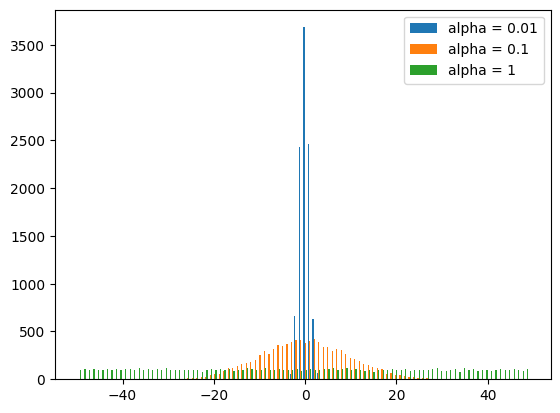

In [ ]:
from numpy.linalg.linalg import qr
import matplotlib.pyplot as plt

def modQ(n,q):
  n = n%q
  if n >= q/2:
    n = n - q
  return int(n)

def generate_error(m, alpha, q):
  vec = np.round(np.random.normal(loc=0, scale=alpha*q, size=m))
  e = []
  for i in vec:
    e.append(modQ(i,q))
  return e

m = int(10e3)
q = 100
bin_001 = generate_error(m=m, alpha = .01, q=q)
bin_01 = generate_error(m=m, alpha = .1, q=q)
bin_1 = generate_error(m=m, alpha = 1, q=q)

print('[-q/2,q/2-1] = [',int(-q/2),',',int(q/2-1),']')
print('min(bin_001)',min(bin_001),'max(bin_001)',max(bin_001))
print('min(bin_01)',min(bin_01),'max(bin_01)',max(bin_01))
print('min(bin_1)',min(bin_1),'max(bin_1)',max(bin_1))
plt.figure()
plt.hist([bin_001, bin_01, bin_1],bins=100)
plt.legend(labels=['alpha = 0.01', 'alpha = 0.1', 'alpha = 1'])

When the value of $\alpha$ increases the distribution is more even, i.e, the variance increases with $\alpha$. With big values of $\alpha$ is more likely to have big error values.

In [ ]:
import random

n = 256
q = 2 ** 16
delta = 2 ** 10
s_set = [-1,0,1]

def getA(n, q):
  return np.random.randint(-q/2, q/2, size=n)

def getS(n):
  return np.array([random.choice(s_set) for _ in range(n)])

alpha_v = np.arange(5e-04,5e-03,5e-04)

###Q3

In [ ]:
m = 10
error_counter = [0]*len(alpha_v)
for ind, alpha in enumerate(alpha_v):
  for _ in range(0,1000):
    s = getS(n)
    a = getA(n, q)
    error = generate_error(1,alpha,q)[0]

    # Encrypt
    sa = 0
    for i,j in zip(s,a):
      sa = modQ(sa + i*j,q)
    deltam = modQ(delta*m,q)
    b = modQ(sa + error + deltam,q)

    # Decrypt
    bsa = modQ(b-sa,q)
    m_hat = modQ(np.round(bsa/delta),q)
    if m != m_hat:
      error_counter[ind]+=1

In [ ]:
print('----------------------')
print('|alpha |error_counter|')
for i,j in zip(alpha_v,error_counter):
  print('|%.4f|%i\t     |' % (i,j))
print('----------------------')

----------------------
|alpha |error_counter|
|0.0005|0	     |
|0.0010|0	     |
|0.0015|0	     |
|0.0020|0	     |
|0.0025|1	     |
|0.0030|8	     |
|0.0035|29	     |
|0.0040|43	     |
|0.0045|74	     |
----------------------


Since larger errors occur for larger $\alpha$ values, there is a higher probability of obtaining a decryption error with larger $\alpha$. This is due to the increase of the error bit length that invades the space reserved for the message.

## Q4

In [58]:
m1 = 10
m2 = 8
error_counter = [0]*len(alpha_v)
for ind, alpha in enumerate(alpha_v):
  for _ in range(0,1000):
    s = getS(n)
    a1 = getA(n, q)
    a2 = getA(n, q)
    error = generate_error(2,alpha,q)
    error1 = error[0]
    error2 = error[1]

    # Encrypt
    sa1 = 0
    for i,j in zip(s,a1):
      sa1 = modQ(sa1 + i*j,q)
    sa2 = 0
    for i,j in zip(s,a2):
      sa2 = modQ(sa2 + i*j,q)
    deltam1 = modQ(delta*m1,q)
    deltam2 = modQ(delta*m2,q)
    b1 = modQ(sa1 + error1 + deltam1,q)
    b2 = modQ(sa2 + error2 + deltam2,q)
    a_plus = []
    for i,j in zip(a1,a2):
      a_plus.append(modQ(i+j,q))
    b_plus = modQ(b1+b2,q)

    # Decrypt
    sa_plus = 0
    for i,j in zip(s,a_plus):
      sa_plus = modQ(sa_plus + i*j,q)
    bsa_plus = modQ(b_plus-sa_plus,q)
    m_hat = modQ(np.round(bsa_plus/delta),q)
    if (m1+m2) != m_hat:
      error_counter[ind]+=1

In [59]:
print('----------------------')
print('|alpha |error_counter|')
for i,j in zip(alpha_v,error_counter):
  print('|%.4f|%i\t     |' % (i,j))
print('----------------------')

----------------------
|alpha |error_counter|
|0.0005|0	     |
|0.0010|0	     |
|0.0015|1	     |
|0.0020|6	     |
|0.0025|28	     |
|0.0030|63	     |
|0.0035|100	     |
|0.0040|162	     |
|0.0045|210	     |
----------------------


The error are higher than the errors in Q3. Now we have two errors that can overflow the error space in the message, so there are more chances of corrupting the message.

## Q5

In [60]:
m = 3
c = 4
error_counter = [0]*len(alpha_v)
for ind, alpha in enumerate(alpha_v):
  for _ in range(0,1000):
    s = getS(n)
    a = getA(n, q)
    error = generate_error(1,alpha,q)[0]

    # Encrypt
    sa = 0
    for i,j in zip(s,a):
      sa = modQ(sa + i*j,q)
    deltam = modQ(delta*m,q)
    b = modQ(sa + error + deltam,q)
    ac = []
    for i in a:
      ac.append(modQ(i*c,q))
    bc = modQ(b*c,q)

    # Decrypt
    sac = 0
    for i,j in zip(s,ac):
      sac = modQ(sac+i*j,q)
    bsac = modQ(bc-sac,q)
    m_hat = modQ(np.round(bsac/delta),q)
    if c*m != m_hat:
      error_counter[ind]+=1

In [61]:
print('----------------------')
print('|alpha |error_counter|')
for i,j in zip(alpha_v,error_counter):
  print('|%.4f|%i\t     |' % (i,j))
print('----------------------')

----------------------
|alpha |error_counter|
|0.0005|0	     |
|0.0010|44	     |
|0.0015|203	     |
|0.0020|328	     |
|0.0025|430	     |
|0.0030|521	     |
|0.0035|571	     |
|0.0040|591	     |
|0.0045|677	     |
----------------------


Now we have even more errors (in average). When we do the products $b\cdot c$ and $\textbf{a}\cdot c$ the result are higher than the originals making easier the colission with the message space.

## Q6

In [ ]:
print("Result for Q5 with c=10.")
print('----------------------')
print('|alpha |error_counter|')
for i,j in zip(alpha_v,error_counter):
  print('|%.4f|%i\t     |' % (i,j))
print('----------------------')

Result for Q5 with c=10.
----------------------
|alpha |error_counter|
|0.0005|120	     |
|0.0010|425	     |
|0.0015|568	     |
|0.0020|693	     |
|0.0025|728	     |
|0.0030|778	     |
|0.0035|814	     |
|0.0040|845	     |
|0.0045|857	     |
----------------------


We are having the same problem as before but multiplied by a bigger number, leading to increase the error counter.

* Gadget decomposition

In [68]:
m = 3
p = 3
c = 10# C0=1, C1=1 => c = 2*2^(3*0)+1*2^(3*1)
c_0 = 2*2**(p*0)
c_1 = 1*2**(p*1)
error_counter = [0]*len(alpha_v)
for ind, alpha in enumerate(alpha_v):
  for _ in range(0,1000):
    s = getS(n)
    a = getA(n, q)
    error = generate_error(1,alpha,q)[0]

    # Encrypt
    sa = 0
    for i,j in zip(s,a):
      sa = modQ(sa + i*j,q)
    deltam = modQ(delta*m,q)
    b = modQ(sa + error + deltam,q)
    ac_0 = []
    ac_1 = []
    for i in a:
      ac_0.append(modQ(i*c_0,q))
      ac_1.append(modQ(i*c_1,q))

    bc_0 = modQ(b*c_0,q)
    bc_1 = modQ(b*c_1,q)

    # Decrypt
    sac_0 = 0
    sac_1 = 0
    for i,j,k in zip(s,ac_0,ac_1):
      sac_0 = modQ(sac_0+i*j,q)
      sac_1 = modQ(sac_1+i*k,q)
    bsac_0 = modQ(bc_0-sac_0,q)
    bsac_1 = modQ(bc_1-sac_1,q)
    m_hat_0 = modQ(np.round(bsac_0/delta),q)
    m_hat_1 = modQ(np.round(bsac_1/delta),q)
    m_hat = modQ(m_hat_0+m_hat_1,q)
    if c*m != m_hat:
      error_counter[ind]+=1

In [69]:
print('----------------------')
print('|alpha |error_counter|')
for i,j in zip(alpha_v,error_counter):
  print('|%.4f|%i\t     |' % (i,j))
print('----------------------')

----------------------
|alpha |error_counter|
|0.0005|54	     |
|0.0010|338	     |
|0.0015|529	     |
|0.0020|589	     |
|0.0025|693	     |
|0.0030|743	     |
|0.0035|785	     |
|0.0040|791	     |
|0.0045|824	     |
----------------------


We can appreciate a slightly improvement in the results, specially for small values of $\alpha$.